# PA 2: Classification - Nearest Neighbors

## Student Details (1 Point)

First Student Name and ID:  Sai Charan Thannir - 1001635048 

Second Student Name and ID: Jahnavi Nuthalapati - 1001827251



Notes: When submitting, fill your name and ID in this cell.  [1 point]


Do not to forget to cite any external sources used by you.

## Programming Assignment Submission Instructions (2 Points)

Step 1: Rename this submission file as 'yourLastName_Last4digitsofyourID_DT.ipynb' [1 point]

Step 2: Place this file inside the folder 'PA#2_Classification_yourLastName'  [1 point]

Do not upload the database file [-20 points]


## Programming Assignment Details (25 Points)

For this assignment use Jupyter notebook, Panda, and scikit.
* Load wine dataset from sklearn datasets. [1 points]
* while selecting best 3 attributes for training and testing your model. [2 points]
* Find the best K. [3 points]
* Split your dataset 70% for training, and 30% for testing the classifier. [2 points]
* Use Euclidean distance.[3 points]
* Test the classifier with three diferent numbers for neighbors and record the results.[3 points]
* Use comments to explain your code and variable names.[2 points]
* Calculate and print the confusion matrix, and the classification Report (includes:precision, recall, f1-score, andsupport) for all three different numbers.[6 points]
* Plot the classifier in a 2D projection.[3 points]

# Report (22 Points)

For each classification task you need to submit a report (Microsoft Word, or PDF) that you have to:
* Describe the Nearest Neighbors method. [5 points]
* Explain what was your criteria for selecting the three attributes. [7 points]
* Visualizations of the classifier in a 2D projection, and write your observations. [5 points]
* Interprete and compare the results.[5 points]

Do not to forget to cite your sources!

## <b>Please consult the TA before using any other packages apart from sklearn,numpy,pandas, matplotlib and seaborn<b>

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
import seaborn as sns

%matplotlib inline 
from pandas import Series, DataFrame


In [2]:
#loading the titanic dataset
df=pd.read_csv('titanic.csv',sep=',',encoding='utf8')

In [3]:
#First 5 records
print(df.head())

   Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S  
1  female  38.0      1      0          PC 17599  71.2833   C85        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  female  35.0      1      0            113803  53.1000  C123        S  
4    male  35.0      0      0            373450   8.0500   NaN        S  


In [4]:
#Selecting best 3 attributes. Here we considered Survived, Age and Fare
new_df =df[['Survived','Age','Fare']]
print(new_df)

     Survived   Age     Fare
0           0  22.0   7.2500
1           1  38.0  71.2833
2           1  26.0   7.9250
3           1  35.0  53.1000
4           0  35.0   8.0500
..        ...   ...      ...
886         0  27.0  13.0000
887         1  19.0  30.0000
888         0   NaN  23.4500
889         1  26.0  30.0000
890         0  32.0   7.7500

[891 rows x 3 columns]


In [5]:
#Data Preprocessing
#replacing all nan in fare and age with respective median
new_df['Fare'] = new_df['Fare'].fillna(new_df['Fare'].dropna().median())
new_df['Age'] = new_df['Age'].fillna(new_df['Age'].dropna().median())

<ipython-input-5-5505363d42f1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Fare'] = new_df['Fare'].fillna(new_df['Fare'].dropna().median())
<ipython-input-5-5505363d42f1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Age'] = new_df['Age'].fillna(new_df['Age'].dropna().median())


In [6]:
print(new_df)

     Survived   Age     Fare
0           0  22.0   7.2500
1           1  38.0  71.2833
2           1  26.0   7.9250
3           1  35.0  53.1000
4           0  35.0   8.0500
..        ...   ...      ...
886         0  27.0  13.0000
887         1  19.0  30.0000
888         0  28.0  23.4500
889         1  26.0  30.0000
890         0  32.0   7.7500

[891 rows x 3 columns]


In [7]:
# Splitting the data 
X = new_df.drop("Survived",axis=1)
Y= new_df["Survived"]

In [8]:
#best k
Best_K = SelectKBest(score_func=chi2, k=1)
fit = Best_K.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes 
Scores = pd.concat([dfcolumns,dfscores],axis=1)
Scores.columns = ['Features','Score']  #name dataframe columns
print(Scores.nlargest(1,'Score'))

  Features        Score
1     Fare  4518.319091


In [9]:
#Spilliting the model into 70% for training and 30 % for testing the classifier
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [10]:
#first classifier where k=1 and using euclidean metric
classifier1 = KNeighborsClassifier(n_neighbors=1, metric='euclidean') 
classifier1.fit(X_train, Y_train) #training the mode

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [11]:
#This predicts the test data values
Y_pred = classifier1.predict(X_test) 

confusion matrix: [[123  45]
 [ 52  48]]
confusion matrix: AxesSubplot(0.125,0.125;0.62x0.755)
classification report:               precision    recall  f1-score   support

           0       0.70      0.73      0.72       168
           1       0.52      0.48      0.50       100

    accuracy                           0.64       268
   macro avg       0.61      0.61      0.61       268
weighted avg       0.63      0.64      0.64       268



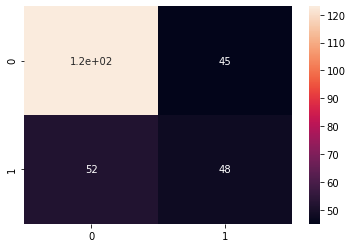

In [12]:
#To print the confusion matrix and report 
cf=confusion_matrix(Y_test, Y_pred)

print("confusion matrix:",confusion_matrix(Y_test, Y_pred))
print("confusion matrix:",sns.heatmap(cf, annot=True))
print("classification report:",classification_report(Y_test, Y_pred))






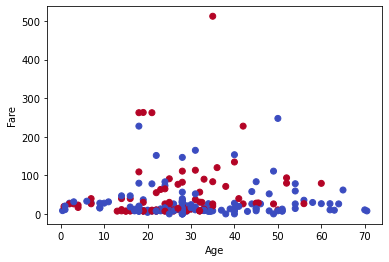

In [13]:
#To get a plot for the selected attributes where k=1
plt.xlabel("Age")
plt.ylabel("Fare")
plt.scatter(X_test['Age'], X_test['Fare'], c=Y_pred,cmap='coolwarm')

confusion matrix: [[128  40]
 [ 55  45]]
classification report:               precision    recall  f1-score   support

           0       0.70      0.76      0.73       168
           1       0.53      0.45      0.49       100

    accuracy                           0.65       268
   macro avg       0.61      0.61      0.61       268
weighted avg       0.64      0.65      0.64       268

confusion matrix: AxesSubplot(0.125,0.125;0.62x0.755)


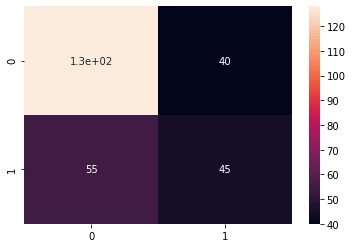

In [14]:
#Second classifier where k=3 and using euclidean metric
classifier2 = KNeighborsClassifier(n_neighbors=3, metric='euclidean') #using metric as euclidean as mentioned in the given criteria
classifier2.fit(X_train, Y_train)
Y_pred = classifier2.predict(X_test)
print("confusion matrix:",confusion_matrix(Y_test, Y_pred))
print("classification report:",classification_report(Y_test, Y_pred))



print("confusion matrix:",sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True))

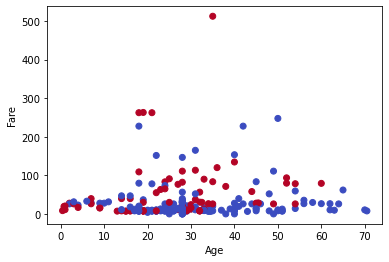

In [15]:

#To get a plot for the selected attributes where k=3
plt.xlabel("Age")
plt.ylabel("Fare")
plt.scatter(X_test['Age'], X_test['Fare'], c=Y_pred, cmap='coolwarm')

confusion matrix: [[142  26]
 [ 56  44]]
classification report:               precision    recall  f1-score   support

           0       0.72      0.85      0.78       168
           1       0.63      0.44      0.52       100

    accuracy                           0.69       268
   macro avg       0.67      0.64      0.65       268
weighted avg       0.68      0.69      0.68       268

confusion matrix: AxesSubplot(0.125,0.125;0.62x0.755)


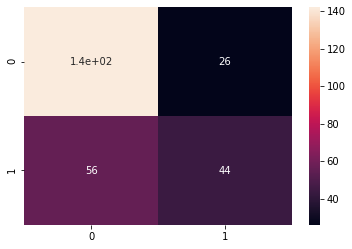

In [16]:
#Third classifier where k=7 and using euclidean metric
classifier3 = KNeighborsClassifier(n_neighbors=7, metric='euclidean') #using metric as euclidean as mentioned in the given criteria
classifier3.fit(X_train, Y_train)
Y_pred = classifier3.predict(X_test)
print("confusion matrix:",confusion_matrix(Y_test, Y_pred))
print("classification report:",classification_report(Y_test, Y_pred))
print("confusion matrix:",sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True))

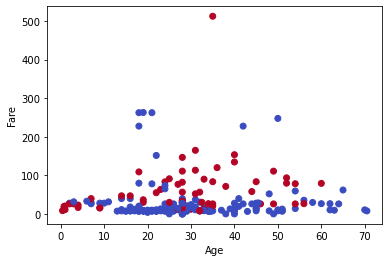

In [17]:
#To get a plot for the selected attributes where k=7
plt.xlabel("Age")
plt.ylabel("Fare")
plt.scatter(X_test['Age'], X_test['Fare'], c=Y_pred, cmap='coolwarm')
#The below graph shows the target value for the taken x=Area , y=Fare values

Text(0, 0.5, 'Accuracy')

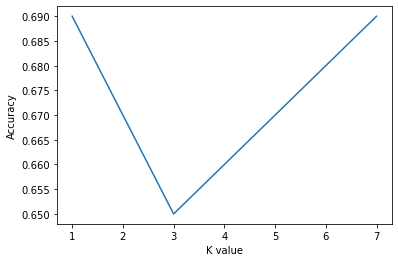

In [18]:
# classifier in a 2D projection for all three different numbers
#x is the k values considered
#y is the accuracy for each considered k values(approximately)
x = (1,3,7)
y = [0.69, 0.65 , 0.69]

plt.plot(x, y)
plt.xlabel('K value')
plt.ylabel('Accuracy')